In [7]:
# required packages
import os
import json
import pandas as pd
import seaborn as sns 

In [8]:
# result.json contains flattened json (so list of dicts)
f = open(os.path.join(os.getcwd(), "..", "data_collection", "json", "flat_json_hiphop_rock_jazz.json"))
json_data = json.load(f)

# Convert list of dicts to dataframe
df = pd.DataFrame(json_data) 
df.head()

,category.id,category.name,category.playlist.id,category.playlist.name,category.playlist.track.id,category.playlist.track.name,category.playlist.track.album.id,category.playlist.track.album.name,category.playlist.track.artist,category.playlist.track.feature.danceability,...,category.playlist.track.feature.loudness,category.playlist.track.feature.mode,category.playlist.track.feature.speechiness,category.playlist.track.feature.acousticness,category.playlist.track.feature.instrumentalness,category.playlist.track.feature.liveness,category.playlist.track.feature.valence,category.playlist.track.feature.tempo,category.playlist.track.feature.duration_ms,category.playlist.track.feature.time_signature
0,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,2BcMwX1MPV6ZHP4tUT9uq6,Knife Talk (with 21 Savage ft. Project Pat),3SpBlxme9WbeQdI9kx7KAV,Certified Lover Boy,"Drake, 21 Savage, Project Pat",0.849,...,-9.579,0,0.324,0.0635,0,0.0834,0.153,145.887,242966,4
1,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,3J4VKkUpLvomXJbn9ZAypO,Sharing Locations (feat. Lil Baby & Lil Durk),0q6qOUfC4ikWtv62KCnoip,Sharing Locations (feat. Lil Baby & Lil Durk),"Meek Mill, Lil Durk, Lil Baby",0.681,...,-5.585,1,0.0385,0.00383,0,0.139,0.183,151.951,161053,4
2,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,7Bpx2vsWfQFBACRz4h3IqH,family ties (with Kendrick Lamar),3HqmX8hGcbbQZODgayNEYx,family ties (with Kendrick Lamar),"Baby Keem, Kendrick Lamar",0.711,...,-5.453,1,0.329,0.00575,0,0.231,0.144,134.14,252070,4
3,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,52nTQQahs46s1iHFQ3Wv5Q,Pissed Me Off,70m1QwzUoogjk2DDq1hA3b,Pissed Me Off,Lil Durk,0.723,...,-10.707,0,0.485,0.00311,1.26e-06,0.115,0.223,155.967,123077,4
4,hiphop,Hip Hop,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,4KDNRh9Oor80z3XIxdWlui,Bubbly (with Drake & Travis Scott),7IKkHmEk4It4cRdOYanyvW,Punk,"Young Thug, Drake, Travis Scott",0.91,...,-7.572,0,0.257,0.0536,0,0.127,0.599,129.011,165067,4


In [9]:
# Drop unneeded columns
columns_to_drop = [
    "category.name",
    "category.playlist.id",
    "category.playlist.name",
    "category.playlist.track.id",
    "category.playlist.track.name",
    "category.playlist.track.album.id",
    "category.playlist.track.album.name",
    "category.playlist.track.artist"
    ]
df = df.drop(columns=columns_to_drop)

df = df.rename(columns={
    "category.id": "category",
    "category.playlist.track.feature.danceability": "feature_danceability",
    "category.playlist.track.feature.energy": "feature_energy",
    "category.playlist.track.feature.key": "feature_key",
    "category.playlist.track.feature.loudness": "feature_loudness",
    "category.playlist.track.feature.mode": "feature_mode",
    "category.playlist.track.feature.speechiness": "feature_speechiness",
    "category.playlist.track.feature.acousticness": "feature_acousticness",
    "category.playlist.track.feature.instrumentalness": "feature_instrumentalness",
    "category.playlist.track.feature.liveness": "feature_liveness",
    "category.playlist.track.feature.valence": "feature_valence",
    "category.playlist.track.feature.tempo": "feature_tempo",
    "category.playlist.track.feature.duration_ms": "feature_duration_ms",
    "category.playlist.track.feature.time_signature": "feature_time_signature"
})
df.head()

,category,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,hiphop,0.849,0.424,5,-9.579,0,0.324,0.0635,0,0.0834,0.153,145.887,242966,4
1,hiphop,0.681,0.63,1,-5.585,1,0.0385,0.00383,0,0.139,0.183,151.951,161053,4
2,hiphop,0.711,0.611,1,-5.453,1,0.329,0.00575,0,0.231,0.144,134.14,252070,4
3,hiphop,0.723,0.516,11,-10.707,0,0.485,0.00311,1.26e-06,0.115,0.223,155.967,123077,4
4,hiphop,0.91,0.585,11,-7.572,0,0.257,0.0536,0,0.127,0.599,129.011,165067,4


In [10]:
# transform data
df_seaborn = df

df_seaborn['feature_danceability']      = df_seaborn['feature_danceability'].astype(float)
df_seaborn['feature_energy']            = df_seaborn['feature_energy'].astype(float)
df_seaborn['feature_key']               = df_seaborn['feature_key'].astype(float)
df_seaborn['feature_loudness']          = df_seaborn['feature_loudness'].astype(float)
df_seaborn['feature_mode']              = df_seaborn['feature_mode'].astype(float)
df_seaborn['feature_speechiness']       = df_seaborn['feature_speechiness'].astype(float)
df_seaborn['feature_acousticness']      = df_seaborn['feature_acousticness'].astype(float)
df_seaborn['feature_instrumentalness']  = df_seaborn['feature_instrumentalness'].astype(float)
df_seaborn['feature_liveness']          = df_seaborn['feature_liveness'].astype(float)
df_seaborn['feature_valence']           = df_seaborn['feature_valence'].astype(float)
df_seaborn['feature_tempo']             = df_seaborn['feature_tempo'].astype(float)
df_seaborn['feature_duration_ms']       = df_seaborn['feature_duration_ms'].astype(float)
df_seaborn['feature_time_signature']    = df_seaborn['feature_time_signature'].astype(float)


df_seaborn.head()

,category,feature_danceability,feature_energy,feature_key,feature_loudness,feature_mode,feature_speechiness,feature_acousticness,feature_instrumentalness,feature_liveness,feature_valence,feature_tempo,feature_duration_ms,feature_time_signature
0,hiphop,0.849,0.424,5.0,-9.579,0.0,0.3240,0.06350,0.000000,0.0834,0.153,145.887,242966.0,4.0
1,hiphop,0.681,0.630,1.0,-5.585,1.0,0.0385,0.00383,0.000000,0.1390,0.183,151.951,161053.0,4.0
2,hiphop,0.711,0.611,1.0,-5.453,1.0,0.3290,0.00575,0.000000,0.2310,0.144,134.140,252070.0,4.0
3,hiphop,0.723,0.516,11.0,-10.707,0.0,0.4850,0.00311,0.000001,0.1150,0.223,155.967,123077.0,4.0
4,hiphop,0.910,0.585,11.0,-7.572,0.0,0.2570,0.05360,0.000000,0.1270,0.599,129.011,165067.0,4.0


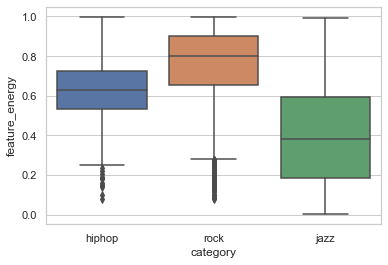

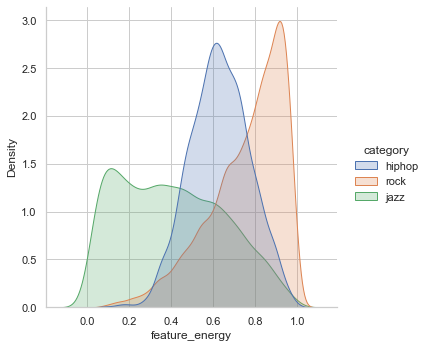

In [14]:
sns.set(style="whitegrid")
ax = sns.boxplot(data = df_seaborn, x = 'category', y = 'feature_energy')
ax = sns.displot(data = df_seaborn, x = 'feature_energy', hue = df_seaborn['category'], kind="kde",fill=True,common_norm=False)